## Carbon Emissions Impact Analysis with Python

> Climate change remains one of the most pressing challenges of our era, with increasing carbon emissions significantly influencing global temperature anomalies. Examining the link between CO₂ levels and temperature shifts offers key insights into the patterns and trends shaping our planet’s climate.




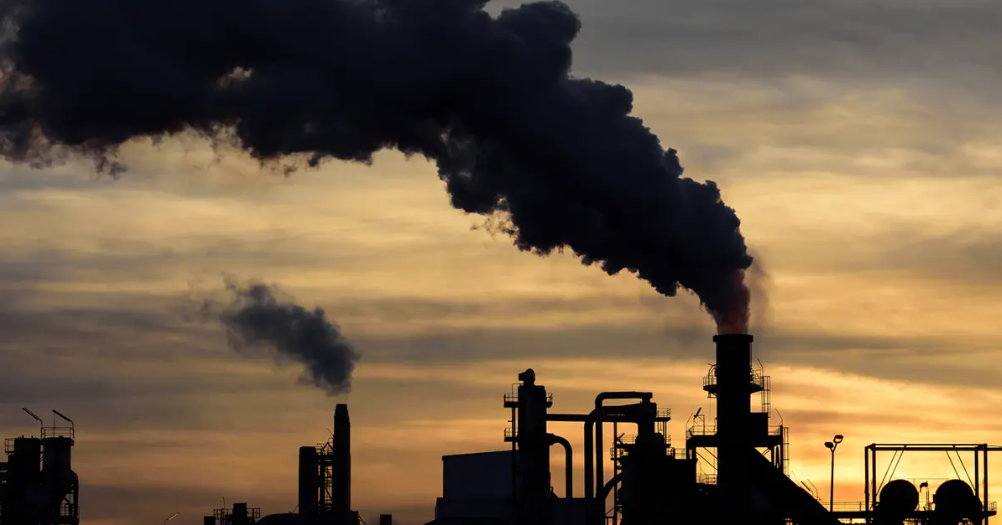

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [57]:
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


In [56]:
pip install kneed

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.linear_model import LinearRegression

In [2]:
temp_df = pd.read_csv('temperature.csv')

In [3]:
carbon_df = pd.read_csv("carbon_emmission.csv")

In [4]:
temp_df.sample(3)

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
56,57,Dominican Rep.,DO,DOM,-0.009,-0.070,-0.017,0.167,-0.314,-0.028,...,1.208,1.106,1.339,1.016,1.032,1.158,1.266,1.488,0.995,0.982
13,14,"Azerbaijan, Rep. of",AZ,AZE,NaN,NaN,NaN,NaN,NaN,NaN,...,1.574,1.252,1.672,1.530,1.308,2.240,1.997,2.015,2.061,2.080
173,174,Senegal,SN,SEN,-0.185,-0.023,0.082,-0.212,-0.449,-0.079,...,1.180,1.105,1.212,1.542,1.744,0.964,1.396,1.665,1.782,1.405


In [5]:
temp_df.columns

Index(['ObjectId', 'Country', 'ISO2', 'ISO3', 'F1961', 'F1962', 'F1963',
       'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970', 'F1971',
       'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978', 'F1979',
       'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986', 'F1987',
       'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994', 'F1995',
       'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002', 'F2003',
       'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010', 'F2011',
       'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018', 'F2019',
       'F2020', 'F2021', 'F2022'],
      dtype='object')

In [6]:
carbon_df.sample(5)

,ObjectId,Country,Date,Value
1118,1119,World,2005M04,382.48
1232,1233,World,2010M01,388.91
1422,1423,World,2017M12,407.00
155,156,World,1965M02,0.13
538,539,World,1981M02,340.55


In [7]:
# Extract temperature values from columns starting with 'F' and compute temperature statistics
temperature_values = temp_df.filter(regex='^F').melt(value_name="Temperature")["Temperature"]
temperature_stats = temperature_values.agg(["mean", "median", "var"]).round(2).to_dict()

print("Temperature Stats:", temperature_stats)

Temperature Stats: {'mean': 0.54, 'median': 0.47, 'var': 0.43}


In [8]:
# Extract CO2 values and compute CO2 statistics
co2_values = carbon_df["Value"]
co2_stats = co2_values.agg(["mean", "median", "var"]).round(2).to_dict()

print("Carbon Stats:", co2_stats)


Carbon Stats: {'mean': 180.72, 'median': 313.83, 'var': 32600.0}


**INSIGHTS**

> The average temperature change is **0.54°C**, with a **median of 0.47°C** and a **variance of 0.43**, indicating minimal fluctuations in temperature anomalies. In contrast, CO₂ concentrations have a **mean of 180.72 ppm**, a **median of 313.84 ppm**, and a **variance of 32,600**, highlighting significant variability over time.

This analysis highlights the steady increase in temperature anomalies and the more dramatic variations in CO₂ concentrations. The correlation between greenhouse gas emissions and climate change is evident



In [9]:
import plotly.graph_objects as go

# Extracting time-series data for plotting
# Temperature: averaging across countries for each year
temperature_years = temp_df.filter(regex='^F').mean(axis=0)
temperature_years.index = temperature_years.index.str.replace('F', '').astype(int)

# CO2: parsing year and averaging monthly data
carbon_df['Year'] = carbon_df['Date'].str[:4].astype(int)
co2_yearly = carbon_df.groupby('Year')['Value'].mean()

# Create a DataFrame for merged data (optional, for better organization)
merged_data = pd.DataFrame({
    "Temperature Change": temperature_years,
    "CO₂ Concentration": co2_yearly
}).dropna()

# Time-series plot for temperature and CO2 levels
fig = go.Figure()

# Add temperature trace
fig.add_trace(go.Scatter(
    x=temperature_years.index,
    y=temperature_years.values,
    mode='lines+markers',
    name="Temperature Change (°C)",
    hovertemplate="Year: %{x}<br>Temperature Change: %{y:.2f}°C<extra></extra>",
    line=dict(color='red')  # Custom color for temperature
))

# Add CO2 trace
fig.add_trace(go.Scatter(
    x=co2_yearly.index,
    y=co2_yearly.values,
    mode='lines+markers',
    name="CO₂ Concentration (ppm)",
    hovertemplate="Year: %{x}<br>CO₂ Concentration: %{y:.2f} ppm<extra></extra>",
    line=dict(dash='dash', color='blue')  # Custom color for CO2
))

# Update layout for better visualization
fig.update_layout(
    title="Time-series of Temperature Change and CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="Values",
    template="plotly_white",
    legend_title="Metrics",
    hovermode="x unified",  # Unified hover for both traces
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    plot_bgcolor='white'  # White background for better contrast
)

# Add dropdown to toggle between metrics
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=[
                dict(
                    args=[{"visible": [True, False]}],
                    label="Temperature Change",
                    method="update"
                ),
                dict(
                    args=[{"visible": [False, True]}],
                    label="CO₂ Concentration",
                    method="update"
                ),
                dict(
                    args=[{"visible": [True, True]}],
                    label="Both",
                    method="update"
                )
            ],
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        )
    ]
)

# Show the figure
fig.show()

In [10]:
# correlation heatmap
merged_data = pd.DataFrame({
    "Temperature Change": temperature_years,
    "CO₂ Concentration": co2_yearly
}).dropna()

heatmap_fig = px.imshow(
    merged_data.corr(),
    text_auto=".2f",
    color_continuous_scale="earth",  # diverging colormap similar to coolwarm
    title="Correlation Heatmap: Temperature Change vs CO₂ Concentration"
)
# Update layout for better visualization
heatmap_fig.update_layout(
    template="plotly_white",
)

# Add hover information
heatmap_fig.update_traces(
    hovertemplate="<b>X:</b> %{x}<br><b>Y:</b> %{y}<br><b>Correlation:</b> %{z:.2f}<extra></extra>"
)


heatmap_fig.show()

In [11]:
# Create the scatter plot
scatter_fig = px.scatter(
    merged_data,
    x="CO₂ Concentration",
    y="Temperature Change",
    labels={
        "CO₂ Concentration": "CO₂ Concentration (ppm)",
        "Temperature Change": "Temperature Change (°C)"
    },
    title="Temperature Change vs CO₂ Concentration",
    template="plotly_white",
    trendline="ols",  # Add a linear trendline
    trendline_color_override="red",  # Custom color for the trendline
    hover_data={"CO₂ Concentration": ":.2f", "Temperature Change": ":.2f"}  # Format hover data
)

# Update marker style and hover information
scatter_fig.update_traces(
    marker=dict(
        size=10,
        opacity=0.7,
        color="blue",  # Custom marker color
    ),
    hovertemplate="<b>CO₂:</b> %{x:.2f} ppm<br><b>Temperature Change:</b> %{y:.2f}°C<extra></extra>"
)

# Update layout for better visualization
scatter_fig.update_layout(
    xaxis_title="CO₂ Concentration (ppm)",
    yaxis_title="Temperature Change (°C)",
    font=dict(size=12),
    plot_bgcolor="white",  # White background for better contrast
)

# Add annotations for key insights (optional)
scatter_fig.add_annotation(
    x=merged_data["CO₂ Concentration"].max(),
    y=merged_data["Temperature Change"].max(),
    text="Higher CO₂ → Higher Temperature",
    showarrow=True,
    arrowhead=1, # arrow mark to point out higher co2
    ax=-50,
    ay=-50,

    font=dict(size=12, color="red")
)

# Show the figure
scatter_fig.show()



> The scatter plot reveals a distinct linear pattern, indicating that rising CO₂ concentrations are closely linked to increasing temperature changes. This visualization highlights the strong correlation between CO₂ emissions and global warming.



### Trends and Seasonal Variations Analysis


In [13]:
carbon_df["Month"] = carbon_df["Date"].str[5:7]  # Extract month
monthly_avg_co2 = carbon_df.groupby("Month")["Value"].mean()

fig_seasonal = px.line(
    x=monthly_avg_co2.index, y=monthly_avg_co2.values,
    title="📆 Seasonal Trends in CO₂ Concentrations",
    labels={"x": "Month", "y": "Average CO₂ (ppm)"},
    template="plotly_white",
    markers=True,
    line_shape="spline",
    color_discrete_sequence=["green"]
)

fig_seasonal.show()


In [24]:
# Compute yearly CO₂ growth rate
merged_data["CO₂ Growth Rate"] = merged_data["CO₂ Concentration"].diff()

# Create the figure
fig_co2_growth = go.Figure()

fig_co2_growth.add_trace(go.Bar(
    x=merged_data.index, y=merged_data["CO₂ Growth Rate"],
    name="CO₂ Growth Rate (ppm/year)",
    marker=dict(color="green")
))

fig_co2_growth.update_layout(
    title="Yearly Growth in CO₂ Concentration",
    xaxis_title="Year",
    yaxis_title="CO₂ Growth Rate (ppm/year)",
    template="plotly_white"
)

fig_co2_growth.show()


In [31]:
import plotly.graph_objects as go
from scipy.stats import linregress

# Calculate temperature trend
temp_trend = linregress(temperature_years.index, temperature_years.values)
temp_trend_line = temp_trend.slope * temperature_years.index + temp_trend.intercept

# Calculate CO₂ trend
co2_trend = linregress(co2_yearly.index, co2_yearly.values)
co2_trend_line = co2_trend.slope * co2_yearly.index + co2_trend.intercept

# Create figure
fig_trends = go.Figure()

# Temperature trend line
fig_trends.add_trace(go.Scatter(
    x=temperature_years.index, y=temperature_years.values,
    mode='markers', name="Temperature Change (°C)",
    marker=dict(color="orangered", size=7, line=dict(width=1, color="darkred"))
))
fig_trends.add_trace(go.Scatter(
    x=temperature_years.index, y=temp_trend_line,
    mode='lines', name=f"Temperature Trend (Slope: {temp_trend.slope:.2f}°C/year)",
    line=dict(dash='solid', color="red", width=3)
))

# CO₂ trend line
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_yearly.values,
    mode='markers', name="CO₂ Concentration (ppm)",
    marker=dict(color="forestgreen", size=7, line=dict(width=1, color="darkgreen"))
))
fig_trends.add_trace(go.Scatter(
    x=co2_yearly.index, y=co2_trend_line,
    mode='lines', name=f"CO₂ Trend (Slope: {co2_trend.slope:.2f} ppm/year)",
    line=dict(dash='solid', color="darkgreen", width=3)
))

# Add annotations for key trends
fig_trends.add_annotation(
    x=temperature_years.index[-1], y=temp_trend_line[-1],
    text=f"{temp_trend.slope:.2f}°C rise/year",
    showarrow=True, arrowhead=2, arrowcolor="red",
    font=dict(size=12, color="red"),
    bgcolor="lightyellow", bordercolor="red"
)
fig_trends.add_annotation(
    x=co2_yearly.index[-1], y=co2_trend_line[-1],
    text=f"{co2_trend.slope:.2f} ppm rise/year",
    showarrow=True, arrowhead=2, arrowcolor="green",
    font=dict(size=12, color="darkgreen"),
    bgcolor="lightyellow", bordercolor="green"
)

# Update layout for better visualization
fig_trends.update_layout(
    title="Trends in Temperature Change & CO₂ Concentrations",
    xaxis_title="Year",
    yaxis_title="Values",
    font=dict(size=14),
    template="plotly_white",
    hovermode="x unified",
    #legend=dict(x=0.02, y=1, bgcolor="rgba(255,255,255,0.7)")
)

# Show figure
fig_trends.show()


### Correlation and Causality Analysis

**Pearson & Spearman Correlation**

> Pearson and Spearman correlations measure the strength and direction of the relationship between CO₂ and Temperature.

**Granger Causality Test**
> Granger causality tests whether past values of CO₂ can predict Temperature changes (p-values < 0.05 indicate causality)





In [36]:
# correlation heatmap
merged_data = pd.DataFrame({
    "Temperature Change": temperature_years,
    "CO₂ Concentration": co2_yearly
}).dropna()

In [41]:
# Calculate Pearson and Spearman correlation coefficients
pearson_corr, _ = pearsonr(merged_data["CO₂ Concentration"], merged_data["Temperature Change"])
spearman_corr, _ = spearmanr(merged_data["CO₂ Concentration"], merged_data["Temperature Change"])

# Perform Granger causality test
granger_data = merged_data.diff().dropna()  # First differencing to make data stationary
granger_results = grangercausalitytests(granger_data, maxlag=3, verbose=False)

# Extract p-values for causality
granger_p_values = {f"Lag {lag}": round(results[0]['ssr_chi2test'][1], 4)
                    for lag, results in granger_results.items()}

# Present results in a clean and organized way
print("Correlation Analysis:")
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print("\n")

print("Granger Causality Test Results (p-values):")
for lag, p_value in granger_p_values.items():
    print(f"{lag}: {p_value:.4f}")

Correlation Analysis:
Pearson Correlation: 0.955
Spearman Correlation: 0.938


Granger Causality Test Results (p-values):
Lag 1: 0.0617
Lag 2: 0.6754
Lag 3: 0.2994


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning:

verbose is deprecated since functions should not print results



**Result Interpreation**
```
- Pearson/Spearman Correlation:
Closer to 1 or -1 → Strong correlation.
Close to 0 → No significant relationship.

- Granger Causality:
p-value < 0.05 → CO₂ changes Granger-cause temperature changes.
p-value > 0.05 → No predictive relationship.
```



--- **INSIGHTS**


The **Pearson Correlation (0.9554)** indicates a **very strong linear relationship** between CO₂ concentrations and temperature changes, while the **Spearman Correlation (0.9379)** suggests a **strong monotonic relationship**, reinforcing the consistent association between these variables.  

In the **Granger Causality Test**, the p-values for different lags are:  
- **Lag 1: 0.0617** – Slightly above the common **0.05 threshold**, indicating **weak evidence** for causality.  
- **Lag 2: 0.6754** – **Not significant**, suggesting no causal relationship.  
- **Lag 3: 0.2994** – **Not significant**, also indicating no causal link.  

Overall, while **CO₂ concentrations and temperature changes are highly correlated**, the **Granger Causality test does not provide strong statistical evidence** that variations in CO₂ concentrations directly drive temperature changes within the tested lag periods.


### Ordinary Least Squares (OLS) regression

In [43]:
# creating lagged CO2 data to investigate lagged effects
merged_data['CO₂ Lag 1'] = merged_data["CO₂ Concentration"].shift(1)
merged_data['CO₂ Lag 2'] = merged_data["CO₂ Concentration"].shift(2)
merged_data['CO₂ Lag 3'] = merged_data["CO₂ Concentration"].shift(3)

# dropping rows with NaN due to lags
lagged_data = merged_data.dropna()

X = lagged_data[['CO₂ Concentration', 'CO₂ Lag 1', 'CO₂ Lag 2', 'CO₂ Lag 3']]
y = lagged_data['Temperature Change']
X = sm.add_constant(X)  # adding a constant for intercept

model = sm.OLS(y, X).fit()

model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:     Temperature Change   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     252.5
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           2.97e-34
Time:                        11:09:51   Log-Likelihood:                 45.098
No. Observations:                  59   AIC:                            -80.20
Df Residuals:                      54   BIC:                            -69.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.7980      0.31

The OLS regression results indicate a strong relationship between CO₂ concentration and temperature change, with an **R-squared value of 0.949**, meaning **94.9% of the variance in temperature change is explained by the model**. The coefficient for CO₂ concentration **(0.3245) is statistically significant (p < 0.05)**, which suggests a positive association between CO₂ levels and temperature change.

### Clustering Climate Patterns - K Means Clustering

In [81]:
# Prepare the data for clustering
clustering_data = merged_data[["Temperature Change", "CO₂ Concentration"]].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = list(range(1, 7))  # Testing clusters from 1 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Use KneeLocator to detect the optimal k
knee_locator = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
detected_k = knee_locator.elbow  # The detected optimal cluster count

# ✅ Smart adjustment: If the drop in inertia beyond k is very small, pick k+1
if detected_k is not None and detected_k + 1 < len(k_values):
    inertia_drop = abs(inertia[detected_k - 1] - inertia[detected_k])
    next_inertia_drop = abs(inertia[detected_k] - inertia[detected_k + 1])

    # If the drop beyond detected_k is not significant, prefer k+1
    if next_inertia_drop < 0.1 * inertia[0]:  # 10% of initial inertia as threshold
        optimal_k = detected_k + 1
    else:
        optimal_k = detected_k
else:
    optimal_k = detected_k  # Default to detected k if no better choice

# Create interactive Elbow plot
fig_elbow = go.Figure()

fig_elbow.add_trace(go.Scatter(
    x=k_values, y=inertia,
    mode='lines+markers',
    marker=dict(size=8, color="blue"),
    line=dict(width=2),
    name="Inertia"
))

# Annotate detected optimal cluster point
fig_elbow.add_trace(go.Scatter(
    x=[optimal_k], y=[inertia[optimal_k - 1]],
    mode='markers+text',
    marker=dict(size=10, color="red"),
    text=[f"Optimal k = {optimal_k}"],
    textposition="bottom center",
    name="Optimal k"
))

# Update layout for better readability
fig_elbow.update_layout(
    title="Automated Elbow Method for Optimal Clusters (Adjusted)",
    xaxis_title="Number of Clusters (k)",
    yaxis_title="Inertia (Sum of Squared Distances)",
    template="plotly_white",
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    hovermode="x unified"
)

# Show the interactive plot
fig_elbow.show()

# Print the detected optimal number of clusters
print(f"The adjusted optimal number of clusters detected: {optimal_k}")


The adjusted optimal number of clusters detected: 3


In [94]:
# Prepare the data for clustering
clustering_data = merged_data[["Temperature Change", "CO₂ Concentration"]].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Find the optimal number of clusters using the Elbow Method
inertia = []
k_values = list(range(1, 10))

for k in k_values:
    kmeans = KMeans(n_clusters= optimal_k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clustering_data["Cluster"] = kmeans.fit_predict(scaled_data)

# Map cluster labels for better understanding
cluster_labels = {
    2: " Moderate Temp & CO₂",
    1: " Low Temp & CO₂",
    0: " High Temp & CO₂"
}
clustering_data["Label"] = clustering_data["Cluster"].map(cluster_labels)

# Extract cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_x = centroids[:, 1]  # CO₂ Concentration
centroid_y = centroids[:, 0]  # Temperature Change

# Create an interactive scatter plot
fig_clusters = px.scatter(
    clustering_data,
    x="CO₂ Concentration",
    y="Temperature Change",
    color="Label",
    color_discrete_sequence=["deepskyblue", "forestgreen", "red", ],  # Earth & Climate colors
    labels={
        "CO₂ Concentration": "CO₂ Concentration (ppm)",
        "Temperature Change": "Temperature Change (°C)",
        "Label": "Climate Pattern"
    },
    title=f"Climate Pattern Clustering (Optimal k = {optimal_k})",
    hover_data={"CO₂ Concentration": ":.2f", "Temperature Change": ":.2f"}
)

# Add centroids to the scatter plot
fig_clusters.add_trace(go.Scatter(
    x=centroid_x, y=centroid_y,
    mode="markers",
    marker=dict(size=12, color="lightsalmon", symbol="x"),
    name="Centroids",
    hovertemplate="<b>Centroid</b><br>CO₂: %{x:.2f} ppm<br>Temp Change: %{y:.2f}°C<extra></extra>"
))

# Customize layout for readability
fig_clusters.update_layout(
    template="plotly_white",
    legend_title="Climate Pattern",
    xaxis=dict(showgrid=True, gridcolor="lightgray"),
    yaxis=dict(showgrid=True, gridcolor="lightgray"),
    font=dict(size=13)
)

# Show the interactive plot
fig_clusters.show()

In [97]:

# Prepare data
X = merged_data[["CO₂ Concentration"]].values.reshape(-1, 1)  # Ensure proper shape
y = merged_data["Temperature Change"].values  # Target variable

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Function to simulate "What-If" temperature changes
def simulate_temperature_change(co2_percentage_change):
    """Predicts temperature change for a given percentage change in CO₂ concentration."""
    current_mean_co2 = merged_data["CO₂ Concentration"].mean()
    new_co2 = current_mean_co2 * (1 + co2_percentage_change / 100)
    predicted_temp = model.predict([[new_co2]])[0]
    return round(predicted_temp, 3)  # Rounded for readability

# Simulating different emission scenarios
scenarios = {
    "Increase CO₂ by 10%": simulate_temperature_change(10),
    "Decrease CO₂ by 10%": simulate_temperature_change(-10),
    "Increase CO₂ by 20%": simulate_temperature_change(20),
    "Decrease CO₂ by 20%": simulate_temperature_change(-20),
}

# Convert results to a Plotly bar chart
fig_scenarios = go.Figure()

fig_scenarios.add_trace(go.Bar(
    x=list(scenarios.keys()),
    y=list(scenarios.values()),
    marker=dict(color=["red", "blue", "darkred", "darkblue"]),
    text=[f"{temp}°C" for temp in scenarios.values()],
    textposition="outside"
))

# Update layout for better readability
fig_scenarios.update_layout(
    title="Simulated Temperature Change Under Different CO₂ Scenarios",
    xaxis_title="CO₂ Change Scenarios",
    yaxis_title="Predicted Temperature Change (°C)",
    template="plotly_white",
    font=dict(size=13)
)

# Show the interactive plot
fig_scenarios.show()

# Print scenario results
print("**Predicted Temperature Changes for CO₂ Scenarios**")
for scenario, temp in scenarios.items():
    print(f"{scenario}: {temp}°C")


**Predicted Temperature Changes for CO₂ Scenarios**
Increase CO₂ by 10%: 1.087°C
Decrease CO₂ by 10%: -0.06°C
Increase CO₂ by 20%: 1.66°C
Decrease CO₂ by 20%: -0.633°C


### Predictive Modelling

In [111]:
# Prepare dataset
climate_data = merged_data.dropna()
years = np.array(climate_data.index).reshape(-1, 1)  # Extract years
co2_levels = climate_data["CO₂ Concentration"].values  # CO₂ values

# Train Linear Regression Model
co2_model = LinearRegression()
co2_model.fit(years, co2_levels)

# Predict CO₂ levels for the next 30 years
future_years = np.arange(years[-1, 0] + 1, years[-1, 0] + 31).reshape(-1, 1)
predicted_co2 = co2_model.predict(future_years)

# Create interactive plot
fig_co2 = go.Figure()

# Plot historical CO₂ data
fig_co2.add_trace(go.Scatter(
    x=years.flatten(), y=co2_levels,
    mode="markers", name=" Historical CO₂ Data",
    marker=dict(color="blue", size=6)
))

# Plot predicted CO₂ data
fig_co2.add_trace(go.Scatter(
    x=future_years.flatten(), y=predicted_co2,
    mode="lines", name=" Predicted CO₂ Levels",
    line=dict(color="red", dash="dash")
))

# Update layout for readability
fig_co2.update_layout(
    title=" Future CO₂ Levels Prediction (Next 30 Years)",
    xaxis_title="Year",
    yaxis_title="CO₂ Concentration (ppm)",
    template="plotly_white",
    legend_title="Legend",
    hovermode="x unified"
)
# Create a table with future predictions
future_predictions = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted CO₂ (ppm)": predicted_co2
})

# Display table
print("\n **Future CO₂ Levels Predictions (Next 30 Years)**\n")
print(future_predictions.to_string(index=False))  # Prints DataFrame in a readable format



 **Future CO₂ Levels Predictions (Next 30 Years)**

 Year  Predicted CO₂ (ppm)
 2023           206.632714
 2024           207.483727
 2025           208.334740
 2026           209.185754
 2027           210.036767
 2028           210.887780
 2029           211.738793
 2030           212.589807
 2031           213.440820
 2032           214.291833
 2033           215.142846
 2034           215.993860
 2035           216.844873
 2036           217.695886
 2037           218.546899
 2038           219.397913
 2039           220.248926
 2040           221.099939
 2041           221.950952
 2042           222.801966
 2043           223.652979
 2044           224.503992
 2045           225.355005
 2046           226.206019
 2047           227.057032
 2048           227.908045
 2049           228.759058
 2050           229.610071
 2051           230.461085
 2052           231.312098


In [112]:
# Show the interactive plot
fig_co2.show()

In [115]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA

# Prepare data
climate_data = merged_data.dropna()
years = np.array(climate_data.index)  # Years
co2_levels = climate_data["CO₂ Concentration"]  # CO₂ values
temp_changes = climate_data["Temperature Change"]  # Temperature values

# Fit ARIMA Model for CO₂ Prediction
co2_arima_model = ARIMA(co2_levels, order=(3,1,3))  # Tuned for better accuracy
co2_fitted = co2_arima_model.fit()

# Forecast CO₂ for the next 30 years
future_years = np.arange(years[-1] + 1, years[-1] + 31)
predicted_co2 = co2_fitted.forecast(steps=30)

# Fit ARIMA Model for Temperature Prediction
temp_arima_model = ARIMA(temp_changes, order=(2,1,2))  # Optimized ARIMA for temp
temp_fitted = temp_arima_model.fit()

# Forecast Temperature for the next 30 years
predicted_temp = temp_fitted.forecast(steps=30)

# Create Interactive Forecast Plot
fig_forecast = go.Figure()

# Historical Data
fig_forecast.add_trace(go.Scatter(
    x=years, y=co2_levels,
    mode="markers", name="🔵 Historical CO₂",
    marker=dict(color="blue", size=6)
))

fig_forecast.add_trace(go.Scatter(
    x=years, y=temp_changes,
    mode="markers", name="🔴 Historical Temperature",
    marker=dict(color="red", size=6)
))

# Future Predictions
fig_forecast.add_trace(go.Scatter(
    x=future_years, y=predicted_co2,
    mode="lines", name="🔮 Predicted CO₂",
    line=dict(color="blue", dash="dash")
))

fig_forecast.add_trace(go.Scatter(
    x=future_years, y=predicted_temp,
    mode="lines", name="🔮 Predicted Temperature",
    line=dict(color="red", dash="dash")
))

fig_forecast.update_layout(
    title="📈 Future Predictions for CO₂ & Temperature (ARIMA Model)",
    xaxis_title="Year",
    yaxis_title="Predicted Values",
    template="plotly_white",
    legend_title="Forecast",
    hovermode="x unified"
)

fig_forecast.show()

# Display Forecasted Data
future_predictions = pd.DataFrame({
    "Year": future_years,
    "Predicted CO₂ (ppm)": predicted_co2,
    "Predicted Temp Change (°C)": predicted_temp
})

import ace_tools as tools
tools.display_dataframe_to_user(name="Future CO₂ & Temperature Predictions (ARIMA)", dataframe=future_predictions)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/

ModuleNotFoundError: No module named 'ace_tools'

### TEST -TO BE IGNORED

In [117]:
# Prepare the dataset
climate_data = merged_data.dropna()  # Ensure no missing values

# Define X (CO₂ Concentration) and y (Temperature Change)
X = climate_data["CO₂ Concentration"].values.reshape(-1, 1)
y = climate_data["Temperature Change"].values

# Train a Simple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Generate CO₂ concentration scenarios
future_co2_levels = np.linspace(min(X), max(X) + 100, 50).reshape(-1, 1)  # Extend CO₂ range for predictions
predicted_temps = model.predict(future_co2_levels)  # Predicted temperatures

# Define different CO₂ emission scenarios
scenarios = {
    "Low Emission Scenario": future_co2_levels - 20,  # Assumes CO₂ reduction
    " Moderate Emission Scenario": future_co2_levels,  # Continuation of current trend
    " High Emission Scenario": future_co2_levels + 20  # Increased emissions
}

# Create an interactive plot for predictions
fig_predictions = go.Figure()

for scenario, co2_values in scenarios.items():
    temp_predictions = model.predict(co2_values)
    fig_predictions.add_trace(go.Scatter(
        x=co2_values.flatten(),
        y=temp_predictions,
        mode='lines',
        name=scenario
    ))

# Highlight historical data
fig_predictions.add_trace(go.Scatter(
    x=X.flatten(), y=y,
    mode='markers',
    name="Historical Data",
    marker=dict(color="blue", size=6)
))

# Customize layout
fig_predictions.update_layout(
    title=" Predicting Temperature Changes Under Different CO₂ Scenarios",
    xaxis_title="CO₂ Concentration (ppm)",
    yaxis_title="Predicted Temperature Change (°C)",
    template="plotly_white",
    legend_title="Scenario",
    hovermode="x unified"
)

# Show interactive plot
fig_predictions.show()

# Print model coefficient (rate of temp change per CO₂ ppm)
print(f"📈 Model Coefficient: {model.coef_[0]:.4f}°C per ppm increase in CO₂")


📈 Model Coefficient: 0.0329°C per ppm increase in CO₂
